# PYTROLE - CONTROLE COM PYTHON
- Importando as bibliotecas

In [4]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

- Função que converte a função de transferência da biblioteca control para uma função do sympy

In [5]:
def sympyFunction(tf):
    num, den = ctl.tfdata(tf)
    
    s = sp.var('s')
    num_expr = sum(coef*s**i for i, coef in enumerate(num[0][0][::-1]))
    den_expr = sum(coef*s**i for i, coef in enumerate(den[0][0][::-1]))
    sympy_system = num_expr/den_expr

    return sympy_system

# CONVERTENDO PARA MATRIZ DE ESTADO

$\dot{x} = Ax + Bu$

$y = Cx + Du$

In [3]:
matrix = ctl.tf2ss(G)
A, B, C, D = matrix.A, matrix.B, matrix.C, matrix.D

display(A)
display(B)
display(C)
display(D)

NameError: name 'G' is not defined

# FORMAS CANÔNICAS

### VARIÁVEL DE FASE
Para obter a forma de variáveis de fase, realizamos as seguintes operações:
A = inv(P) * A * P; B = inv(P) * B; C = C * P; D = D, em que P é uma matriz
quadrada com elementos 1 ao longo da diagonal secundária e o restante dos
elementos nulos.

In [187]:
def getVariaveisFase(G):
    matrix = ctl.tf2ss(G)
    A, B, C, D = matrix.A, matrix.B, matrix.C, matrix.D
    
    n = A.shape[0]

    # Cria uma matriz P com elementos 1 na diagonal secundária
    P = np.fliplr(np.eye(n))

    # Calcula a inversa da matriz P
    P_inv = np.linalg.inv(P)

    # Realiza as operações para obter a forma de variáveis de fase
    A = P_inv @ A @ P
    B = P_inv @ B
    C = C @ P
    D = D
    
    return A, B, C, D

A, B, C, D = getVariaveisFase(G)
display(A)
display(B)
display(C)
display(D)

array([[    0.  ,     1.  ,     0.  ,     0.  ],
       [    0.  ,     0.  ,     1.  ,     0.  ],
       [    0.  ,     0.  ,     0.  ,     1.  ],
       [-1000.  ,  -250.  ,  -240.  ,   -20.75]])

array([[0.],
       [0.],
       [0.],
       [1.]])

array([[0., 1., 0., 0.]])

array([[0.]])

### FORMA CONTROLÁVEL

In [188]:
A = np.fliplr(np.flipud(A))
B = np.fliplr(np.flipud(B))
C = np.fliplr(np.flipud(C))
D = np.fliplr(np.flipud(D))

display(A)
display(B)
display(C)
display(D)

array([[  -20.75,  -240.  ,  -250.  , -1000.  ],
       [    1.  ,     0.  ,     0.  ,     0.  ],
       [    0.  ,     1.  ,     0.  ,     0.  ],
       [    0.  ,     0.  ,     1.  ,     0.  ]])

array([[1.],
       [0.],
       [0.],
       [0.]])

array([[0., 0., 1., 0.]])

array([[0.]])

### FORMA OBSERVÁVEL

$A = A^T \newline$
$B = C^T \newline$
$C = B^T \newline$
$D = D$

In [189]:
Ao = A.transpose()
Bo = C.transpose()
Co = B.transpose()
Do = D

display(Ao)
display(Bo)
display(Co)
display(Do)

array([[  -20.75,     1.  ,     0.  ,     0.  ],
       [ -240.  ,     0.  ,     1.  ,     0.  ],
       [ -250.  ,     0.  ,     0.  ,     1.  ],
       [-1000.  ,     0.  ,     0.  ,     0.  ]])

array([[0.],
       [0.],
       [1.],
       [0.]])

array([[1., 0., 0., 0.]])

array([[0.]])

### FORMA MODAL
- Convetendo a TF para sympy object

In [190]:
def getPoles(G):
    s = sp.var('s')
    F = sympyFunction(G)
    F

    num, den = sp.fraction(F)
    solutions = sp.solve(sp.Eq(den, 0))

    for i, value in enumerate(solutions):
        solutions[i] = round(sp.N(value), 2)

    return solutions


solutions = getPoles(G)
solutions

[-10.01 - 10.99*I, -0.36 + 2.1*I, -10.01 + 10.99*I, -0.36 - 2.1*I]

In [191]:
s1, s2, s3, s4 = solutions[3], solutions[1], solutions[0], solutions[2]
s1, s2, s3, s4

(-0.36 - 2.1*I, -0.36 + 2.1*I, -10.01 - 10.99*I, -10.01 + 10.99*I)

In [192]:
F = 20*s/((s-s1) * (s-s2) * (s-s3) * (s-s4))
F

20*s/((s + 0.36 - 2.1*I)*(s + 0.36 + 2.1*I)*(s + 10.01 - 10.99*I)*(s + 10.01 + 10.99*I))

- $a = [G(s) \cdot (s - (-10.01 - 10.99i))]_{s \to -10.01 - 10.99i}$
- Repetir esse padrão para as raízes b, c, d, e

In [18]:
a = sp.expand((F * (s-s1)).subs(s, s1))
b = sp.expand((F * (s-s2)).subs(s, s2))
c = sp.expand((F * (s-s3)).subs(s, s3))
d = sp.expand((F * (s-s4)).subs(s, s4))

In [19]:
A = sp.Matrix([
    [solutions[0], 0, 0, 0],
    [0, solutions[1], 0, 0],
    [0, 0, solutions[2], 0],
    [0, 0, 0, solutions[3]]
])

B = sp.Matrix([
    [1],
    [1],
    [1],
    [1]
])

C = sp.Matrix([[a, b, c, d]])

display(A)
display(B)
display(C)

Matrix([
[-10.01 - 10.99*I,             0,                0,             0],
[               0, -0.36 + 2.1*I,                0,             0],
[               0,             0, -10.01 + 10.99*I,             0],
[               0,             0,                0, -0.36 - 2.1*I]])

Matrix([
[1],
[1],
[1],
[1]])

Matrix([[0.04754 + 0.001018*I, 0.04754 - 0.001018*I, -0.04754 - 0.04194*I, -0.04754 + 0.04194*I]])

# VOLTANDO PARA A TF

- Convertendo para o denominador da função de transferência usando a fórmula: $D(s) = |(sI - A)|$

In [23]:
I = sp.eye(A.shape[0])
s = sp.symbols('s')

resultado = (s*I - A).det()
resultado

(s + 0.36 - 2.1*I)*(s + 0.36 + 2.1*I)*(s + 10.01 - 10.99*I)*(s + 10.01 + 10.99*I)

- Obtendo toda a função de transferência: $T_F = \frac{Y(s)}{U(s)} = C(sI - A)^{-1}B + D$

In [122]:
A, B, C, D = sp.Matrix(A), sp.Matrix(B), sp.Matrix(C), sp.Matrix(D)
s = sp.symbols('s')
I = sp.eye(A.shape[0])

Tf = C * (s*I - A).inv() * B + D
Tf[0]


KeyboardInterrupt



# ANALISANDO A MATRIZ
Podemos usar as matrizes das variáveis de estado para tirar conclusões importantes acerca do sistema

### CONTROLABILIDADE

Um sistema pode ser controlável quando analizarmos a matriz
$c = [B \,\,\, AB \,\,\, A^2B \,\,\,...\,\,\,A^{n-1}B]$, onde $n$ é o número de variáveis de estado, no nosso caso, 4 variáveis

In [35]:
A, B, C, D = getVariaveisFase(G)
A, B, C, D = sp.Matrix(A), sp.Matrix(B), sp.Matrix(C), sp.Matrix(D)

c = sp.Matrix([[B, A*B, A**2*B, A**3*B]])
c

Matrix([
[  0,      0,        0,        1.0],
[  0,      0,      1.0,     -20.75],
[  0,    1.0,   -20.75,   190.5625],
[1.0, -20.75, 190.5625, 775.828125]])

In [36]:
c.det()

1.00000000000000

Como $det([B \,\,\, AB \,\,\, A^2B \,\,\, A^3B]) \neq 0$, O sistema é controlável!

### ESTABILIZABILIDADE - POSTO DA MATRIZ
$rank[\lambda I - A \,\,\,\, B] = n$, no nosso caso, $n=4$ (4 variáveis de estado)

In [27]:
A, B, C, D = getVariaveisFase(G)
A, B, C, D = sp.Matrix(A), sp.Matrix(B), sp.Matrix(C), sp.Matrix(D)

I = sp.eye(4)
lamb = sp.symbols('lambda')

In [28]:
matriz = sp.Matrix(lamb*I - A).row_join(B)
matriz

Matrix([
[lambda,   -1.0,      0,              0,   0],
[     0, lambda,   -1.0,              0,   0],
[     0,      0, lambda,           -1.0,   0],
[1000.0,  250.0,  240.0, lambda + 20.75, 1.0]])

In [29]:
raizes = getPoles(G)
raizes

[-10.01 - 10.99*I, -0.36 + 2.1*I, -10.01 + 10.99*I, -0.36 - 2.1*I]

In [30]:
matriz.applyfunc(lambda f: f.subs(lamb, solutions[0])).rank()

4

### OBSERVABILIDADE

$\left[\begin{matrix}C\\A C\\A^{2} C\\A^{3} C\end{matrix}\right]$

In [30]:
A, B, C, D = getVariaveisFase(G)
A, B, C, D = sp.Matrix(A), sp.Matrix(B), sp.Matrix(C), sp.Matrix(D)

o = sp.Matrix([
    [C],
    [C*A],
    [C*A**2],
    [C*A**3]
])

In [32]:
o.det()

1000.00000000000

Dessa forma, o sistema não é completamente observável

### DETECTABILIDADE

In [34]:
A, B, C, D = getVariaveisFase(G)
A, B, C, D = sp.Matrix(A), sp.Matrix(B), sp.Matrix(C), sp.Matrix(D)

I = sp.eye(4)
lamb = sp.symbols('lambda')

In [35]:
matriz = sp.Matrix(lamb*I - A).col_join(C)
matriz

Matrix([
[lambda,   -1.0,      0,              0],
[     0, lambda,   -1.0,              0],
[     0,      0, lambda,           -1.0],
[1000.0,  250.0,  240.0, lambda + 20.75],
[     0,    1.0,      0,              0]])

In [36]:
raizes = getPoles(G)
raizes

matriz.applyfunc(lambda f: f.subs(lamb, solutions[0])).rank()

4

### DIAGONALIZANDO A MATRIZ

$A = P^{-1}\,A\,P\newline$ 
$B = P^{-1}\,B\newline$
$C = C\,P \newline$
$D = D$

In [37]:
A, B, C, D = getVariaveisFase(G)

In [38]:
def desprezarNumerosPequenos(matriz):
    return np.round(matriz, 3)

In [39]:
autovalores, autovetores = np.linalg.eig(A)

A = np.linalg.inv(autovetores) @ A @ autovetores
B = np.linalg.inv(autovetores) @ B
C = C @ autovetores
D = D

A, B, C, D = desprezarNumerosPequenos(A), desprezarNumerosPequenos(B), desprezarNumerosPequenos(C), desprezarNumerosPequenos(D)
display(sp.Matrix(A))
display(sp.Matrix(B))
display(sp.Matrix(C))
display(sp.Matrix(D))

Matrix([
[-10.014 + 10.988*I,                  0,                0,                0],
[                 0, -10.014 - 10.988*I,                0,                0],
[                 0,                  0, -0.361 + 2.096*I,                0],
[                 0,                  0,                0, -0.361 - 2.096*I]])

Matrix([
[0.511 + 0.481*I],
[0.511 - 0.481*I],
[0.012 + 0.004*I],
[0.012 - 0.004*I]])

Matrix([[0.004*I, -0.004*I, 0.184 - 0.065*I, 0.184 + 0.065*I]])

Matrix([[0]])

Podemos ver que esse sistema é estabilizável, já que todos os valores da matriz B não são nulos, ou seja, dependem da entrada. Então qualquer polo que estiver na direita poderá ser estabilizado pela entrada

# MATRIZ TRANSIÇÃO DE ESTADO
- Obtendo o coeficiente $\mathscr{L}^{-1}\{(sI-A)^{-1}\}$

In [40]:
A, B, C, D = getVariaveisFase(G)
I = sp.eye(A.shape[0])

A, B, C, D = sp.Matrix(A), sp.Matrix(B), sp.Matrix(C), sp.Matrix(D)
display(A)

Matrix([
[      0,    1.0,      0,      0],
[      0,      0,    1.0,      0],
[      0,      0,      0,    1.0],
[-1000.0, -250.0, -240.0, -20.75]])

In [41]:
phi = (s*I - A).inv()
phi

Matrix([
[(1000.0*s**3 + 20750.0*s**2 + 240000.0*s + 250000.0)/(1000.0*s**4 + 20750.0*s**3 + 240000.0*s**2 + 250000.0*s + 1000000.0), (1000.0*s**2 + 20750.0*s + 240000.0)/(1000.0*s**4 + 20750.0*s**3 + 240000.0*s**2 + 250000.0*s + 1000000.0), (1000.0*s + 20750.0)/(1000.0*s**4 + 20750.0*s**3 + 240000.0*s**2 + 250000.0*s + 1000000.0), 1000.0/(1000.0*s**4 + 20750.0*s**3 + 240000.0*s**2 + 250000.0*s + 1000000.0)],
[                                                           -1000.0/(1.0*s**4 + 20.75*s**3 + 240.0*s**2 + 250.0*s + 1000.0),                  (1.0*s**3 + 20.75*s**2 + 240.0*s)/(1.0*s**4 + 20.75*s**3 + 240.0*s**2 + 250.0*s + 1000.0),               (1.0*s**2 + 20.75*s)/(1.0*s**4 + 20.75*s**3 + 240.0*s**2 + 250.0*s + 1000.0),                1.0*s/(1.0*s**4 + 20.75*s**3 + 240.0*s**2 + 250.0*s + 1000.0)],
[                                                         -1000.0*s/(1.0*s**4 + 20.75*s**3 + 240.0*s**2 + 250.0*s + 1000.0),                                (-250.0*s - 1000.0)/(1.0*s*

In [42]:
t, s = sp.symbols('t s')
phi = phi.applyfunc(lambda f: sp.inverse_laplace_transform(f, s, t))

- Assumindo todas as condições iniciais unitárias, ou seja, $x_1(0) = x_2(0) = x_3(0) = x_4(0) = 1$, e assim é possível criar a matriz inicial $x(0)$

In [43]:
Xo = sp.Matrix([[0], [0], [1], [0]])
Xo

Matrix([
[0],
[0],
[1],
[0]])

- Encontrando $\varPhi_2 = \varPhi(t-\tau)$

In [44]:
t, tau = sp.symbols('t tau')
phi_2 = phi.applyfunc(lambda f: f.subs(t, (t - tau)))

- Voltando ao espaço de estados dependente do tempo $x(t) = \varPhi(\tau)\cdot x(0) + \int_0^t\varPhi(t-\tau)\cdot B\cdot u(\tau)\,d\tau$

In [45]:
def roundSympyFunction(expr, num_digits=2):
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(sp.Float)})

x = phi*Xo + (phi_2*B*1).applyfunc(lambda f: sp.integrate(f, (tau, 0, t)))

x = x.applyfunc(lambda exp: sp.expand(exp))
x = x.applyfunc(lambda exp: roundSympyFunction(exp))
x

Matrix([
[                                            -0.e-2*exp(-10.01*t)*sin(10.99*t)*Heaviside(t) + 0.05*exp(-0.36*t)*sin(2.1*t)*Heaviside(t) - 0.e-2*exp(-0.36*t)*cos(2.1*t)*Heaviside(t)],
[ 0.01*exp(-10.01*t)*sin(10.99*t)*Heaviside(t) - 0.1*exp(-10.01*t)*cos(10.99*t)*Heaviside(t) - 0.e-2*exp(-0.36*t)*sin(2.1*t)*Heaviside(t) + 0.1*exp(-0.36*t)*cos(2.1*t)*Heaviside(t)],
[ 0.99*exp(-10.01*t)*sin(10.99*t)*Heaviside(t) + 1.05*exp(-10.01*t)*cos(10.99*t)*Heaviside(t) - 0.2*exp(-0.36*t)*sin(2.1*t)*Heaviside(t) - 0.05*exp(-0.36*t)*cos(2.1*t)*Heaviside(t)],
[-21.43*exp(-10.01*t)*sin(10.99*t)*Heaviside(t) + 0.4*exp(-10.01*t)*cos(10.99*t)*Heaviside(t) + 0.17*exp(-0.36*t)*sin(2.1*t)*Heaviside(t) - 0.4*exp(-0.36*t)*cos(2.1*t)*Heaviside(t)]])

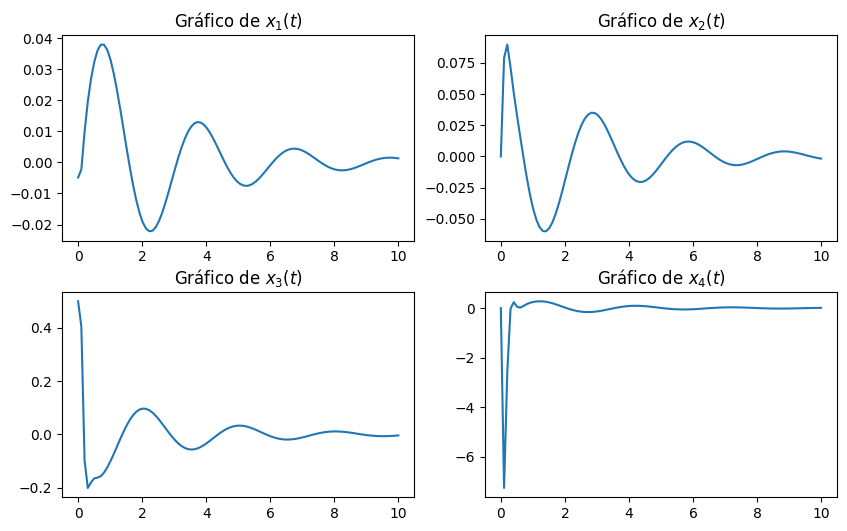

In [52]:
plt.figure(figsize=(10, 6))
plt.subplots_adjust(hspace=0.25)
xData = list(np.linspace(0, 10, 100))

# PLOTANDO O GRÁFICO DE X1
yData = [sp.re(x[0].subs(t, c)) for c in xData]
plt.subplot(2, 2, 1)
plt.title('Gráfico de $x_1(t)$')
plt.plot(xData, yData)

# PLOTANDO O GRÁFICO DE X2
yData = [sp.re(x[1].subs(t, c)) for c in xData]
plt.subplot(2, 2, 2)
plt.title('Gráfico de $x_2(t)$')
plt.plot(xData, yData)

# PLOTANDO O GRÁFICO DE X3
yData = [sp.re(x[2].subs(t, c)) for c in xData]
plt.subplot(2, 2, 3)
plt.title('Gráfico de $x_3(t)$')
plt.plot(xData, yData)

# PLOTANDO O GRÁFICO DE X4
yData = [sp.re(x[3].subs(t, c)) for c in xData]
plt.subplot(2, 2, 4)
plt.title('Gráfico de $x_4(t)$')
plt.plot(xData, yData)

plt.show()

- Encontrando agora a saída $x(t) = Cx + Du(t)$

In [47]:
y = C*x
y = sp.expand(y[0])
y = roundSympyFunction(y, 2)
y

0.01*exp(-10.01*t)*sin(10.99*t)*Heaviside(t) - 0.1*exp(-10.01*t)*cos(10.99*t)*Heaviside(t) - 0.e-2*exp(-0.36*t)*sin(2.1*t)*Heaviside(t) + 0.1*exp(-0.36*t)*cos(2.1*t)*Heaviside(t)

## CONTROLE POR REALIMENTAÇÃO DE ESTADOS
$Ã = A - BK$

$K = \rho\, C^{-1} \, \Delta(A)$

Queremos encontrar os polos do sistema para:

- $UP\% = 20\% = 0.2$
- $\zeta = 0.624$
- $\theta = 51.39^\circ$

Com isso temos um $s = -7.64 \pm 9.56j $

In [48]:
A, B, C, D = getVariaveisFase(G)
s = sp.symbols('s')
I = sp.eye(4)
j = sp.I

s1 = -7.64 + 9.56*j
s2 = -7.64 - 9.56*j

c     = sp.Matrix(np.column_stack([B, A@B, A@A@B, A@A@A@B]))
rho   = sp.Matrix([[0,0, 0, 1]])
delta = sp.expand((s-s1)*(s-s2))
 
display(c)
display(rho)
display(delta)

Matrix([
[  0,      0,        0,        1.0],
[  0,      0,      1.0,     -20.75],
[  0,    1.0,   -20.75,   190.5625],
[1.0, -20.75, 190.5625, 775.828125]])

Matrix([[0, 0, 0, 1]])

s**2 + 15.28*s + 149.7632

In [49]:
def deltaFunc(matrix):
    return matrix**2 + 15.28*matrix + 149.7632*sp.eye(4)

K = rho * c.inv() * deltaFunc(A)
K

Matrix([[149.7632, 16.28, 0, 0]])

In [50]:
A = A - B*K

Tf = C * (s*I - A).inv() * B + D
Tf[0]

1.0*s/(1.0*s**4 + 20.75*s**3 + 240.0*s**2 + 266.28*s + 1149.7632)